In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [4]:
macbook_air = []

In [5]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac

In [6]:
macbook_air

['\nLoved every bit of this gorgeous laptop. The screen, sound quality, touch, and keypad are amazing.\n',
 '\nThe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n',
 '\nBest laptop till date and unbeatable desgin and specs in today moder world as well . Anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs.  Loved the ui and user experience of apple product especially macbook is totally different from any other product\n',
 '\nThanks to Amazon for quick and safe delivery 🙏This is my first MacBook from apple, the screen quality is good as I expectedThe sound quality is amazing, with a  real Dolby and surround sound from the speakers. 👌The trackpad is quite interesting, I have never seen a such trackpad on any other laptop, 👍Overall it is good to buy, go for it without he

In [7]:
len(macbook_air)

390

In [8]:
rev={"review":macbook_air}

In [9]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [10]:
review_data

,review
0,"\nLoved every bit of this gorgeous laptop. The screen, sound quality, touch, and keypad are amazing.\n"
1,\nThe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n
2,\nBest laptop till date and unbeatable desgin and specs in today moder world as well . Anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. Loved the ui and user experience of apple product especially macbook is totally different from any other product\n
3,"\nThanks to Amazon for quick and safe delivery 🙏This is my first MacBook from apple, the screen quality is good as I expectedThe sound quality is amazing, with a real Dolby and surround sound from the speakers. 👌The trackpad is quite interesting, I have never seen a such trackpad on any other laptop, 👍Overall it is good to buy, go for it without hesitation.👍\n"
4,\nThis laptop is not having SMC options as we have in Intel- Macbook.\n
...,...
385,"\nPerformance,Build quality is top notch...😍\n"
386,"\nAmazing form factor and M1 rocks, blazing fast with no heating issues. Battery life feels revolutionised.\n"
387,\nAmazing battery life and great performance\n
388,\nThe best laptop as of date.\n


# Cleaning the text

In [11]:
text=" ".join(review_data)

In [12]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text))
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text)) 
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) 
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [13]:
review_data

,review
0,"\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n"
1,\nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n
2,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n
3,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n"
4,\nthis laptop is not having smc options as we have in intel- macbook.\n
...,...
385,"\nperformance,build quality is top notch...😍\n"
386,"\namazing form factor and m1 rocks, blazing fast with no heating issues. battery life feels revolutionised.\n"
387,\namazing battery life and great performance\n
388,\nthe best laptop as of date.\n


In [14]:
text=" ".join(review_data["review"])

In [15]:
text

'\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n \nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n \nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs.  loved the ui and user experience of apple product especially macbook is totally different from any other product\n \nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a  real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n 

In [16]:
text_tokens = word_tokenize(text)

In [17]:
text_tokens

['loved',
 'every',
 'bit',
 'of',
 'this',
 'gorgeous',
 'laptop',
 '.',
 'the',
 'screen',
 ',',
 'sound',
 'quality',
 ',',
 'touch',
 ',',
 'and',
 'keypad',
 'are',
 'amazing',
 '.',
 'the',
 'battery',
 'backup',
 'is',
 'just',
 'awesome',
 'as',
 'it',
 'easily',
 'lasts',
 'me',
 'for',
 'more',
 'than',
 'a',
 'day',
 'with',
 'non-stop',
 'browsing',
 'and',
 'surfing',
 'the',
 'internet',
 'and',
 'use',
 'of',
 'google',
 'chrome',
 '.',
 'best',
 'laptop',
 'till',
 'date',
 'and',
 'unbeatable',
 'desgin',
 'and',
 'specs',
 'in',
 'today',
 'moder',
 'world',
 'as',
 'well',
 '.',
 'anywhere',
 'you',
 'can',
 'see',
 'its',
 'the',
 'best',
 'and',
 'no.1',
 'choice',
 'laptop',
 'still',
 'and',
 'yes',
 'it',
 'desrves',
 'it',
 'as',
 'the',
 'name',
 'says',
 'macbook',
 'is',
 'macbook',
 '..',
 'apple',
 'products',
 'does',
 'true',
 'to',
 'their',
 'desgin',
 'n',
 'specs',
 '.',
 'loved',
 'the',
 'ui',
 'and',
 'user',
 'experience',
 'of',
 'apple',
 'prod

# Create the DF

In [18]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [19]:
tf=TfidfVectorizer()

In [20]:
text_tf=tf.fit_transform(text_without_sw)

In [21]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
df

,000,10,100,10finally,10get,10hours,10i,10k,10light,10th,...,xps,year,years,yesterday,yet,you,youtube,yrs,yu,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
words_list=" ".join(df)

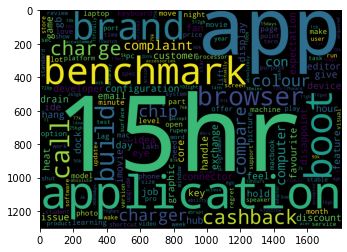

In [24]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

# Sentimental Analysis

In [25]:

with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [26]:
with open ("negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]

In [27]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [28]:
pos_text=" ".join([word for word in df if not word  in positive_words])

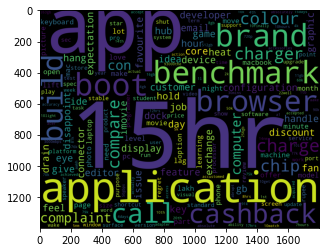

In [29]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

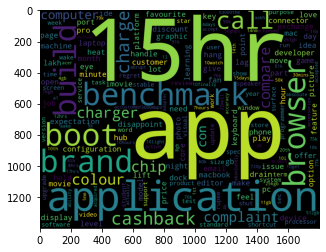

In [30]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [33]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n",0.750000,0.600000
1,\nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n,0.777778,0.644444
2,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n,0.575000,0.417857
3,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n",0.469872,0.358333
4,\nthis laptop is not having smc options as we have in intel- macbook.\n,0.000000,0.000000
...,...,...,...
385,"\nperformance,build quality is top notch...😍\n",0.500000,0.500000
386,"\namazing form factor and m1 rocks, blazing fast with no heating issues. battery life feels revolutionised.\n",0.750000,0.400000
387,\namazing battery life and great performance\n,0.825000,0.700000
388,\nthe best laptop as of date.\n,0.300000,1.000000


In [34]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n",0.750000,0.600000,Positive
1,\nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n,0.777778,0.644444,Positive
2,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n,0.575000,0.417857,Positive
3,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n",0.469872,0.358333,Positive
4,\nthis laptop is not having smc options as we have in intel- macbook.\n,0.000000,0.000000,Neutral
...,...,...,...,...
385,"\nperformance,build quality is top notch...😍\n",0.500000,0.500000,Positive
386,"\namazing form factor and m1 rocks, blazing fast with no heating issues. battery life feels revolutionised.\n",0.750000,0.400000,Positive
387,\namazing battery life and great performance\n,0.825000,0.700000,Positive
388,\nthe best laptop as of date.\n,0.300000,1.000000,Positive


In [35]:
review_data['analysis'].value_counts()

Positive    313
Neutral      51
Negative     26
Name: analysis, dtype: int64

In [36]:
#positive comments
((270+35)/330)*100

92.42424242424242

In [37]:
#negative comments
(25/330)*100

7.575757575757576